# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import tree

# Project team and roles
<b>By : <i>Dr.Abeer</i></b>

# Hotel Data Set(understanding our data),(hotel booking demand)
<b>columns:</b></br>

<i>hotel</i> : our label(two unique >> City hotel & Resort hotel)

<i>is_canceled</i> : Value indicating if the booking was canceled (1) or not (0) 

<i>lead_time</i> : Number of days that elapsed between the entering date of the "booking into the PMS and the arrival date

<i>stays_in_weekend_nights</i> : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

<i>stays_in_week_nights</i> : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

<i>country</i> : in the ISO 3155–3:2013 format

<i>market_segment</i> : Market segment designation. groups customers together according to the following categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

<i>distribution_channel</i> : Predicts booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

<i>assigned_room_type</i> : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

<i>booking_changes</i> : Number of changes made to the booking from the moment the booking was entered on the system

<i>agent</i> : ID of the travel agency that made the booking

In [3]:
#import the data
data = pd.read_csv("C:\\Users\\Hello\\Desktop\\hotel_bookings.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


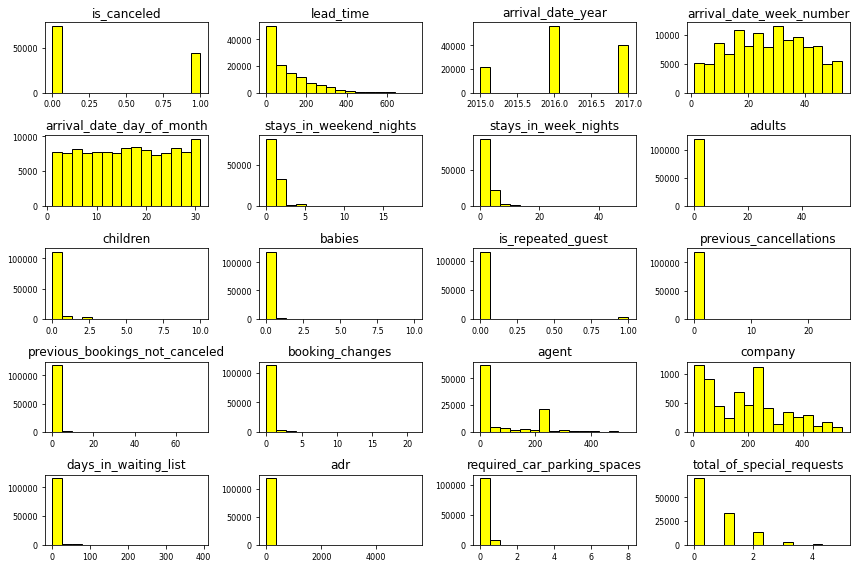

In [7]:
data.hist(bins=15, color='yellow', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))   

# dealing with null values

In [8]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
null_company_percent = (data["company"].isnull().sum()*100)/len(data["company"])
null_company_percent

94.30689337465449

<b><p style="color : #884DFF">given that the percentage of missing values in the "company" column is 94%...which is rather high we will be dropping that column</p></b>

In [10]:
data.drop("company",axis=1,inplace=True)

In [11]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [12]:
data["agent"].fillna(data["agent"].median(), inplace = True)

In [13]:
data["country"].fillna(method = 'ffill', inplace = True)

In [14]:
data["children"].fillna(data['children'].min(), inplace = True)

In [15]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# Remove noise:
first we will be dealling with the non numeric features, then we will be dealling with the outliers

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [17]:
#Converting string month to numerical one (Dec = 12, Jan = 1, etc.)
#we will be creating a new object that contains the months column that we will be converting
#and an array of the same length
datetime_object = data['arrival_date_month'].str[0:]
month_number = np.zeros(len(datetime_object))
datetime_object

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 119390, dtype: object

In [18]:
# Creating a new column based on numerical representation of the months
#we imported the datetime library so that we can use its datetime object that has a strptime 
#method that takes the time, month day and year and converts it to numeric data
for i in range(0, len(datetime_object)):
    datetime_object[i] = datetime.strptime(datetime_object[i], "%B")
    month_number[i] = datetime_object[i].month

# Float to integer conversion
month_number = pd.DataFrame(month_number).astype(int)
# 3 columns are merged into one new column
data['arrival_date'] = data['arrival_date_year'].astype(str) + '-' + month_number[0].astype(str) + '-' + data['arrival_date_day_of_month'].astype(str)

In [19]:
# Dropping already used columns
data = data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
                  'arrival_date_week_number'], axis=1)
data.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-7-1
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-7-1
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-7-1
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-7-1
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-7-1


In [20]:
# Converting wrong datatype columns to correct type (object to datetime)
data['arrival_date'] = pd.to_datetime(data['arrival_date'])
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])


print('Datatype of the arrival_date:', data['arrival_date'].dtype)
print('Datatype of the reservation_status_date:', data['reservation_status_date'].dtype)

Datatype of the arrival_date: datetime64[ns]
Datatype of the reservation_status_date: datetime64[ns]


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   stays_in_weekend_nights         119390 non-null  int64         
 4   stays_in_week_nights            119390 non-null  int64         
 5   adults                          119390 non-null  int64         
 6   children                        119390 non-null  float64       
 7   babies                          119390 non-null  int64         
 8   meal                            119390 non-null  object        
 9   country                         119390 non-null  object        
 10  market_segment                  119390 non-null  object 

In [22]:
pd.DataFrame(data['adr'].describe())

,adr
count,119390.000000
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,5400.000000


In [23]:
#from the previous data describtion we can see that the adr's column min value is negative and since we
# know that the average rate income can't be negative, we will be dropping this row as it is noisy
data['adr'].idxmin()

14969

In [24]:
data.drop(index=14969 , inplace=True)

# handling outliers

In [25]:
#boxplots can only handle numeric data, from here on we will be using a new data set to visiualize our 
#numeric data and drop all our outliers
new_data = data.select_dtypes(exclude=['object']).select_dtypes(exclude=['datetime64[ns]'])

([<matplotlib.axis.XTick at 0x1853c2f16a0>,
 [Text(1, 0, 'is_canceled'),
  Text(2, 0, 'lead_time'),
  Text(3, 0, 'stays_in_weekend_nights'),
  Text(4, 0, 'stays_in_week_nights'),
  Text(5, 0, 'adults'),
  Text(6, 0, 'children'),
  Text(7, 0, 'babies'),
  Text(8, 0, 'is_repeated_guest'),
  Text(9, 0, 'previous_cancellations'),
  Text(10, 0, 'previous_bookings_not_canceled'),
  Text(11, 0, 'booking_changes'),
  Text(12, 0, 'agent'),
  Text(13, 0, 'days_in_waiting_list'),
  Text(14, 0, 'adr'),
  Text(15, 0, 'required_car_parking_spaces'),
  Text(16, 0, 'total_of_special_requests')])

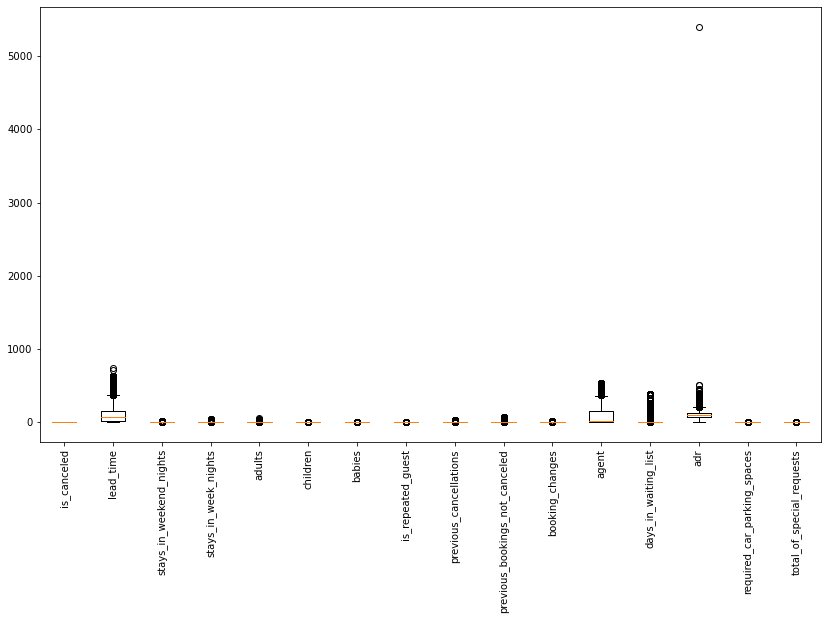

In [26]:
#first we specify the width and height of our boxplot, then we plot it, then we use the xticks function to 
#replace the index with the names of the columns to see what we are visiualizing
plt.figure(figsize = (14,8))
plt.boxplot(new_data)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,16],new_data.columns, rotation=90)

In [27]:
#drop outliers, and clean rows
new_data.drop(new_data.index[new_data["adr"] > 5000], inplace = True)
new_data.drop("is_canceled", axis =1, inplace = True)
new_data.drop("children", axis =1, inplace = True)
new_data.drop("agent", axis =1, inplace = True)

In [28]:
new_data

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,0,0,2,0,0,0,0,3,0,0.00,0,0
1,737,0,0,2,0,0,0,0,4,0,0.00,0,0
2,7,0,1,1,0,0,0,0,0,0,75.00,0,0
3,13,0,1,1,0,0,0,0,0,0,75.00,0,0
4,14,0,2,2,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2,5,2,0,0,0,0,0,0,96.14,0,0
119386,102,2,5,3,0,0,0,0,0,0,225.43,0,2
119387,34,2,5,2,0,0,0,0,0,0,157.71,0,4
119388,109,2,5,2,0,0,0,0,0,0,104.40,0,0


([<matplotlib.axis.XTick at 0x18537795c10>,
 [Text(1, 0, 'lead_time'),
  Text(2, 0, 'stays_in_weekend_nights'),
  Text(3, 0, 'stays_in_week_nights'),
  Text(4, 0, 'adults'),
  Text(5, 0, 'babies'),
  Text(6, 0, 'is_repeated_guest'),
  Text(7, 0, 'previous_cancellations'),
  Text(8, 0, 'previous_bookings_not_canceled'),
  Text(9, 0, 'booking_changes'),
  Text(10, 0, 'days_in_waiting_list'),
  Text(11, 0, 'adr'),
  Text(12, 0, 'required_car_parking_spaces'),
  Text(13, 0, 'total_of_special_requests')])

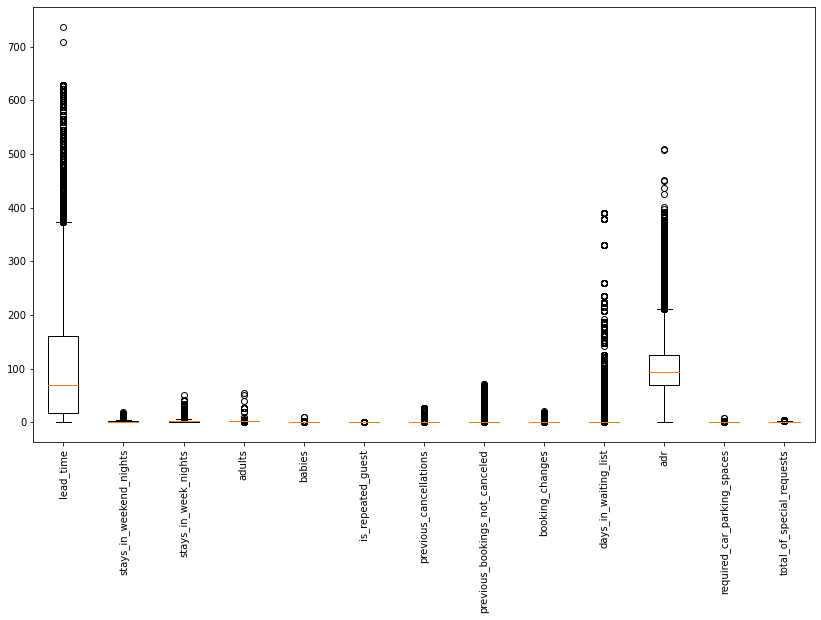

In [29]:
plt.figure(figsize = (14,8))
plt.boxplot(new_data)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],new_data.columns, rotation=90)

In [30]:
#drop outliers
new_data.drop(new_data.index[new_data["lead_time"] > 700], inplace = True)
new_data.drop(new_data.index[new_data["adr"] > 420], inplace = True)
new_data.drop(new_data.index[new_data["days_in_waiting_list"] > 300], inplace = True)

([<matplotlib.axis.XTick at 0x18537f8da00>,
 [Text(1, 0, 'lead_time'),
  Text(2, 0, 'stays_in_weekend_nights'),
  Text(3, 0, 'stays_in_week_nights'),
  Text(4, 0, 'adults'),
  Text(5, 0, 'babies'),
  Text(6, 0, 'is_repeated_guest'),
  Text(7, 0, 'previous_cancellations'),
  Text(8, 0, 'previous_bookings_not_canceled'),
  Text(9, 0, 'booking_changes'),
  Text(10, 0, 'days_in_waiting_list'),
  Text(11, 0, 'adr'),
  Text(12, 0, 'required_car_parking_spaces'),
  Text(13, 0, 'total_of_special_requests')])

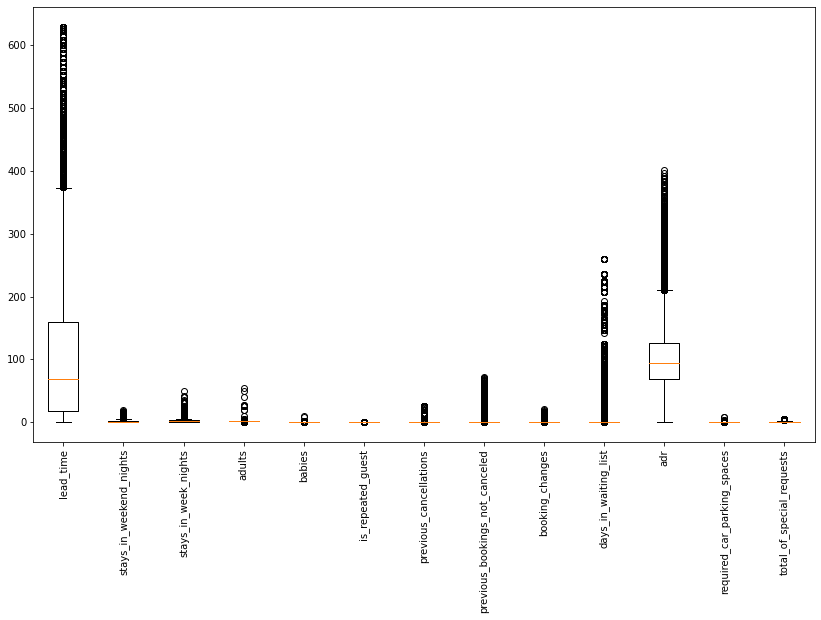

In [31]:
plt.figure(figsize = (14,8))
plt.boxplot(new_data, vert = True)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],new_data.columns, rotation=90)

In [32]:
new_data

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,0,0,2,0,0,0,0,3,0,0.00,0,0
2,7,0,1,1,0,0,0,0,0,0,75.00,0,0
3,13,0,1,1,0,0,0,0,0,0,75.00,0,0
4,14,0,2,2,0,0,0,0,0,0,98.00,0,1
5,14,0,2,2,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2,5,2,0,0,0,0,0,0,96.14,0,0
119386,102,2,5,3,0,0,0,0,0,0,225.43,0,2
119387,34,2,5,2,0,0,0,0,0,0,157.71,0,4
119388,109,2,5,2,0,0,0,0,0,0,104.40,0,0


In [33]:
data

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0.0,0,BB,BEL,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2,5,3,0.0,0,BB,FRA,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2,5,2,0.0,0,BB,DEU,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2,5,2,0.0,0,BB,GBR,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


<b><p style="color : #884DFF">drop outliers in the original data</p></b>

In [34]:
data.drop(data.index[data["adr"] > 420], inplace = True)
data.drop(data.index[data["lead_time"] > 700], inplace = True)
data.drop(data.index[data["days_in_waiting_list"] > 300], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119305 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119305 non-null  object        
 1   is_canceled                     119305 non-null  int64         
 2   lead_time                       119305 non-null  int64         
 3   stays_in_weekend_nights         119305 non-null  int64         
 4   stays_in_week_nights            119305 non-null  int64         
 5   adults                          119305 non-null  int64         
 6   children                        119305 non-null  float64       
 7   babies                          119305 non-null  int64         
 8   meal                            119305 non-null  object        
 9   country                         119305 non-null  object        
 10  market_segment                  119305 non-null  object 

In [35]:
data.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000,119305.000000
mean,0.370194,103.788374,0.928083,2.500407,1.856309,0.103910,0.007954,0.031918,0.087180,0.137169,0.221122,76.787427,2.086182,101.792450,0.062554,0.571669
std,0.482859,106.526980,0.998385,1.908036,0.579449,0.398574,0.097471,0.175783,0.844634,1.497954,0.652315,105.918162,14.880107,48.091243,0.245358,0.792869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.360000,0.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.800000,0.000000,0.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,259.000000,402.000000,8.000000,5.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119305 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119305 non-null  object        
 1   is_canceled                     119305 non-null  int64         
 2   lead_time                       119305 non-null  int64         
 3   stays_in_weekend_nights         119305 non-null  int64         
 4   stays_in_week_nights            119305 non-null  int64         
 5   adults                          119305 non-null  int64         
 6   children                        119305 non-null  float64       
 7   babies                          119305 non-null  int64         
 8   meal                            119305 non-null  object        
 9   country                         119305 non-null  object        
 10  market_segment                  119305 non-null  object 

# remove duplicate rows from the data
<b><p style="color : #884DFF">Dataframes has an embeded function that allows you to view if the row is duplicate or not if we used this and the sum function, it will sum all the rows that returns true, thus returning the sum of duplicate rows</p></b>

In [37]:
data.duplicated().sum()

31953

In [38]:
#we then used another embeded function that allows us to drop all duplicates
data.drop_duplicates(inplace = True)

In [39]:
#we then checked that all the duplicated rows where actually dropped
data.duplicated().sum()

0

# feature selection

<b><p style="color : #884DFF">mostly the date time data will not be usefull,for the decision tree the data will be continious thus useless
the knn model will not be able to deal with the date time, thus deamed useless
so we will be dropping this column
</p></b>

In [40]:
data.drop('arrival_date', 1, inplace=True)
data.drop('reservation_status_date', 1, inplace=True)

C:\Users\Hello\AppData\Local\Temp/ipykernel_14668/2262341546.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop('arrival_date', 1, inplace=True)
C:\Users\Hello\AppData\Local\Temp/ipykernel_14668/2262341546.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop('reservation_status_date', 1, inplace=True)


<b><p style="color : #884DFF">we can bring together 2 columns the babies and children by summing up the values, 
and putting it under the name babies and children
</p></b>

In [41]:
data['babies and children'] = data['babies'] + data['children']
data.drop('babies', axis = 1, inplace = True)
data.drop('children', axis = 1, inplace = True)

In [42]:
new_data = data.select_dtypes(exclude=['int64']).select_dtypes(exclude=['datetime64[ns]']).select_dtypes(exclude=['float64'])
new_data.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
6,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out


In [43]:
for column in new_data.columns:
    print(f"{column}: \n{new_data[column].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP'
 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MY

In [44]:
new_data.drop('assigned_room_type', 1, inplace= True)
new_data.drop('country', 1, inplace= True)
new_data.drop('reservation_status', 1, inplace= True)

C:\Users\Hello\AppData\Local\Temp/ipykernel_14668/1495613923.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data.drop('assigned_room_type', 1, inplace= True)
C:\Users\Hello\AppData\Local\Temp/ipykernel_14668/1495613923.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data.drop('country', 1, inplace= True)
C:\Users\Hello\AppData\Local\Temp/ipykernel_14668/1495613923.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data.drop('reservation_status', 1, inplace= True)


In [45]:
#country is a useless column, that is hard to deal with considering the number of its unique values
data.drop('country', 1, inplace=True)
data.drop('assigned_room_type', 1, inplace= True)
data.drop('reservation_status', 1, inplace= True)
data

C:\Users\Hello\AppData\Local\Temp/ipykernel_14668/3317135724.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop('country', 1, inplace=True)
C:\Users\Hello\AppData\Local\Temp/ipykernel_14668/3317135724.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop('assigned_room_type', 1, inplace= True)
C:\Users\Hello\AppData\Local\Temp/ipykernel_14668/3317135724.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop('reservation_status', 1, inplace= True)


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,is_repeated_guest,...,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,babies and children
0,Resort Hotel,0,342,0,0,2,BB,Direct,Direct,0,...,C,3,No Deposit,14.0,0,Transient,0.00,0,0,0.0
2,Resort Hotel,0,7,0,1,1,BB,Direct,Direct,0,...,A,0,No Deposit,14.0,0,Transient,75.00,0,0,0.0
3,Resort Hotel,0,13,0,1,1,BB,Corporate,Corporate,0,...,A,0,No Deposit,304.0,0,Transient,75.00,0,0,0.0
4,Resort Hotel,0,14,0,2,2,BB,Online TA,TA/TO,0,...,A,0,No Deposit,240.0,0,Transient,98.00,0,1,0.0
6,Resort Hotel,0,0,0,2,2,BB,Direct,Direct,0,...,C,0,No Deposit,14.0,0,Transient,107.00,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,BB,Offline TA/TO,TA/TO,0,...,A,0,No Deposit,394.0,0,Transient,96.14,0,0,0.0
119386,City Hotel,0,102,2,5,3,BB,Online TA,TA/TO,0,...,E,0,No Deposit,9.0,0,Transient,225.43,0,2,0.0
119387,City Hotel,0,34,2,5,2,BB,Online TA,TA/TO,0,...,D,0,No Deposit,9.0,0,Transient,157.71,0,4,0.0
119388,City Hotel,0,109,2,5,2,BB,Online TA,TA/TO,0,...,A,0,No Deposit,89.0,0,Transient,104.40,0,0,0.0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87352 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87352 non-null  object 
 1   is_canceled                     87352 non-null  int64  
 2   lead_time                       87352 non-null  int64  
 3   stays_in_weekend_nights         87352 non-null  int64  
 4   stays_in_week_nights            87352 non-null  int64  
 5   adults                          87352 non-null  int64  
 6   meal                            87352 non-null  object 
 7   market_segment                  87352 non-null  object 
 8   distribution_channel            87352 non-null  object 
 9   is_repeated_guest               87352 non-null  int64  
 10  previous_cancellations          87352 non-null  int64  
 11  previous_bookings_not_canceled  87352 non-null  int64  
 12  reserved_room_type             

# data normalization
<b><p style="color : #884DFF">in the below code, we converted categorial data to numeric data, because not all models can work with categorial data, especially models that depend on calculating the distance like knn</p></b>

In [47]:
categorial_columns = new_data.drop('hotel', axis =1).columns
categorial_columns
data[categorial_columns]=data[categorial_columns].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87352 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           87352 non-null  object  
 1   is_canceled                     87352 non-null  int64   
 2   lead_time                       87352 non-null  int64   
 3   stays_in_weekend_nights         87352 non-null  int64   
 4   stays_in_week_nights            87352 non-null  int64   
 5   adults                          87352 non-null  int64   
 6   meal                            87352 non-null  category
 7   market_segment                  87352 non-null  category
 8   distribution_channel            87352 non-null  category
 9   is_repeated_guest               87352 non-null  int64   
 10  previous_cancellations          87352 non-null  int64   
 11  previous_bookings_not_canceled  87352 non-null  int64   
 12  reserved_room_typ

In [48]:
data[categorial_columns]=data[categorial_columns].apply(lambda x:LabelEncoder().
                                                        fit_transform(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87352 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87352 non-null  object 
 1   is_canceled                     87352 non-null  int64  
 2   lead_time                       87352 non-null  int64  
 3   stays_in_weekend_nights         87352 non-null  int64  
 4   stays_in_week_nights            87352 non-null  int64  
 5   adults                          87352 non-null  int64  
 6   meal                            87352 non-null  int32  
 7   market_segment                  87352 non-null  int32  
 8   distribution_channel            87352 non-null  int32  
 9   is_repeated_guest               87352 non-null  int64  
 10  previous_cancellations          87352 non-null  int64  
 11  previous_bookings_not_canceled  87352 non-null  int64  
 12  reserved_room_type             

# remove correlated attributes

<b><p style="color : #884DFF">we used the correlation function to get the correlation matrix, it has lots of advantages such as, deleting
we then used the heatmap function from seaborn library to convert it to a table so that it will be easy
to visiualize the highly correlated values, the function takes the data we want to visiualize, in this case 
it is our correlation matrix, and the annot parameter takes true to write numbers in the cells, else it will just be colors,
and linewidth which takes Width of the lines that will divide each cell.
</p></b>

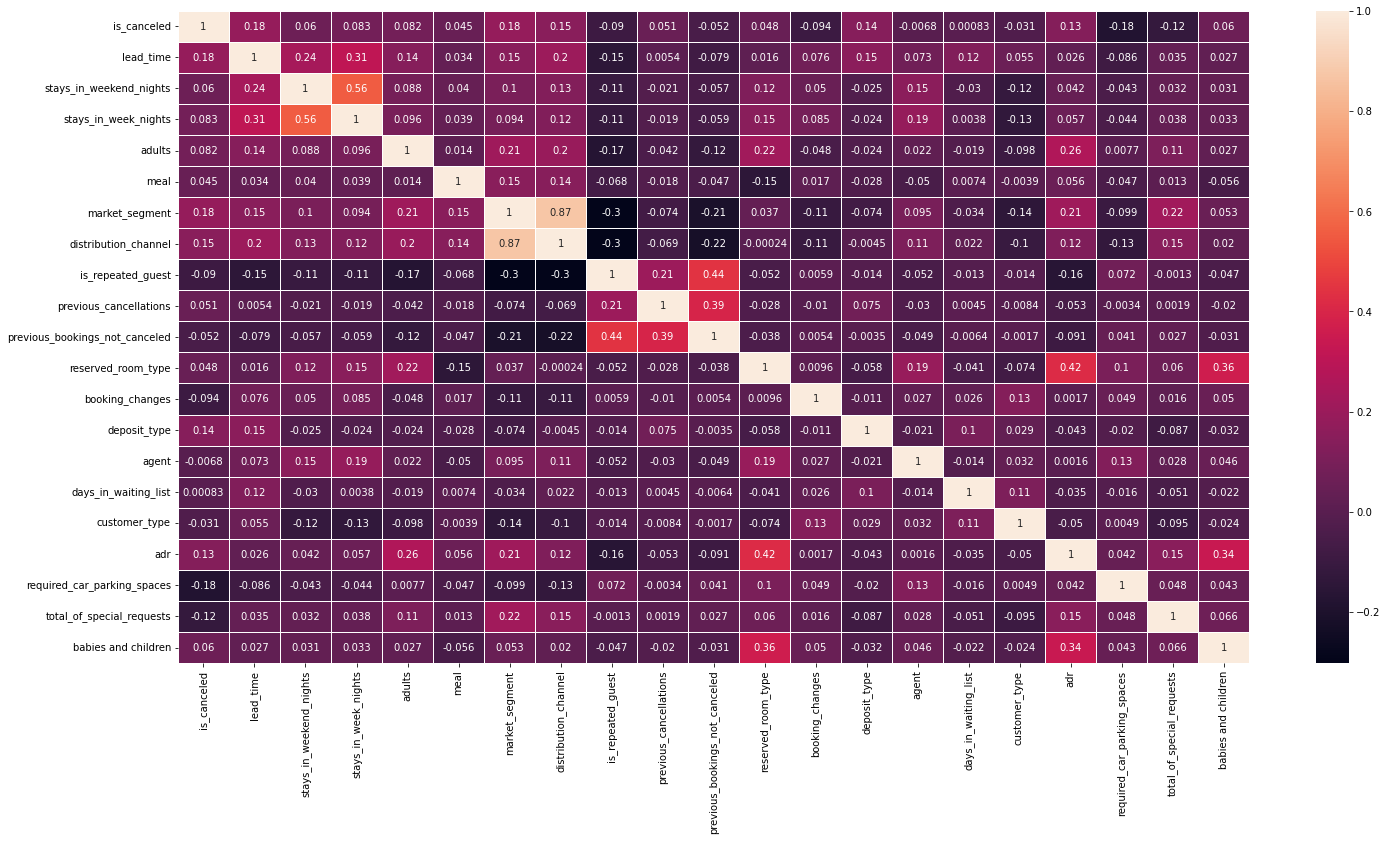

In [49]:
plt.figure(figsize = (24, 12))
corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

<b><p style="color : #884DFF">from the above correlation table we can see that there is no positive correlation (=) or greater than 0.8
and no negative correlation that is (=) or less than(-0.8)</p></b>

# data discretization
<b><p style="color : #884DFF">when we have a column that has continious data, it will be a hastle for our model training, therefore we will be converting columns with continious data to discrete data.</p></b>

In [50]:
data['adr'].head()

0      0.0
2     75.0
3     75.0
4     98.0
6    107.0
Name: adr, dtype: float64

In [51]:
#adr column has continous values so discretization will be applied on this column 
data['adr'].describe()

count    87352.000000
mean       106.266913
std         51.924518
min          0.000000
25%         72.000000
50%         98.100000
75%        134.000000
max        402.000000
Name: adr, dtype: float64

In [52]:
data['adr'].max()

402.0

In [53]:
data['adr'].min()

0.0

In [54]:
song_duration = 402.0 # these two 
num_of_parts = 6   # are given

part_duration = song_duration / num_of_parts
parts = []
marker = 0

for _ in range(num_of_parts):
    part = [marker, marker + part_duration]
    marker += part_duration
    parts.append(part)

print(parts)

[[0, 67.0], [67.0, 134.0], [134.0, 201.0], [201.0, 268.0], [268.0, 335.0], [335.0, 402.0]]


In [55]:
meanadr=[]
for i in parts:
    meanadr.append(sum(i)//len(i))
print(meanadr)

[33.0, 100.0, 167.0, 234.0, 301.0, 368.0]


In [56]:
data['avr_rate']=pd.cut(data['adr'],6,labels= meanadr)

In [57]:
data['avr_rate'].head()

C:\Users\Hello\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0     33.0
2    100.0
3    100.0
4    100.0
6    100.0
Name: avr_rate, dtype: category
Categories (6, float64): [33.0 < 100.0 < 167.0 < 234.0 < 301.0 < 368.0]

In [58]:
data['adr'].head()

0      0.0
2     75.0
3     75.0
4     98.0
6    107.0
Name: adr, dtype: float64

In [59]:
data['avr_rate'] = data['avr_rate'].astype('int64')
data.drop('adr', axis = 1, inplace = True)

In [60]:
data['avr_rate']

0          33
2         100
3         100
4         100
6         100
         ... 
119385    100
119386    234
119387    167
119388    100
119389    167
Name: avr_rate, Length: 87352, dtype: int64

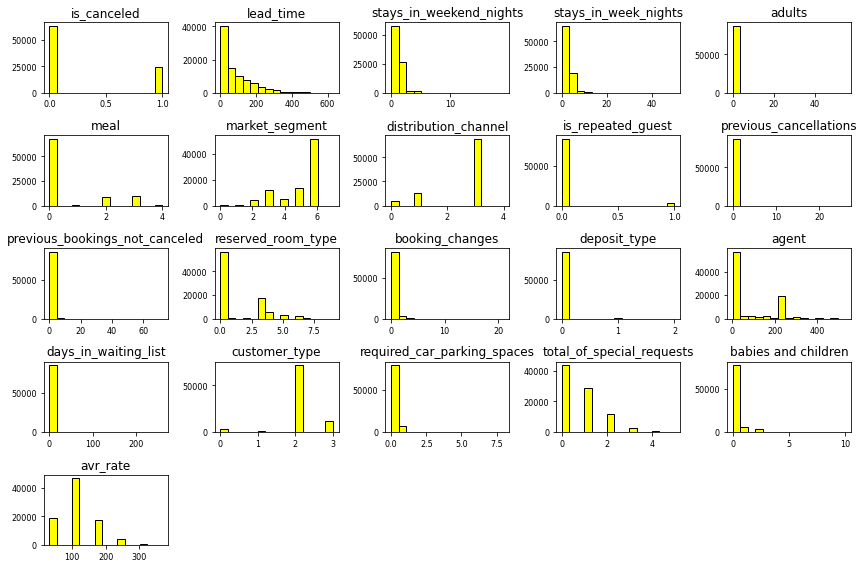

In [61]:
data.hist(bins=15, color='yellow', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))   

# test and train data


In [62]:
data.to_csv('C:\\Users\\Hello\\Desktop\\processed_hotel_data.csv')

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x = data.drop("hotel", axis = 1)
y = data["hotel"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [65]:
test = pd.DataFrame()
test_data = test.append(x_test)
test_data['target'] = y_test

In [66]:
train = pd.DataFrame()
train_data = train.append(x_train)
train_data['target'] = y_train

In [67]:
train_data.to_csv('C:\\Users\\Hello\\Desktop\\train_hotel_data.csv')
test_test.to_csv('C:\\Users\\Hello\\Desktop\\test_hotel_data.csv')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87352 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87352 non-null  object 
 1   is_canceled                     87352 non-null  int64  
 2   lead_time                       87352 non-null  int64  
 3   stays_in_weekend_nights         87352 non-null  int64  
 4   stays_in_week_nights            87352 non-null  int64  
 5   adults                          87352 non-null  int64  
 6   meal                            87352 non-null  int32  
 7   market_segment                  87352 non-null  int32  
 8   distribution_channel            87352 non-null  int32  
 9   is_repeated_guest               87352 non-null  int64  
 10  previous_cancellations          87352 non-null  int64  
 11  previous_bookings_not_canceled  87352 non-null  int64  
 12  reserved_room_type             

# Decision Tree

<b><p style="color : #884DFF">import decision tree from sklearn</p></b>

In [69]:
from sklearn.tree import DecisionTreeClassifier
#Create an instance of the decision tree
model = DecisionTreeClassifier(random_state=1)

In [70]:
#fit the data into the model
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [71]:
#calculate the target column
pred_y= model.predict(x_test)

In [72]:
pred_y

array(['Resort Hotel', 'Resort Hotel', 'City Hotel', ..., 'City Hotel',
       'City Hotel', 'City Hotel'], dtype=object)

In [73]:
#calculate the accuracy
print("Accuracy:",metrics.accuracy_score(y_test,pred_y))

Accuracy: 0.9560414401007383


# KNN

<b><p style="color : #884DFF">import libraries</p></b>

In [74]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [75]:
#Create a KNN model instance with n_neighbors=7
KNN = KNeighborsClassifier(n_neighbors = 7)

In [76]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [77]:
pred = KNN.predict(x_test)
pred

array(['Resort Hotel', 'City Hotel', 'City Hotel', ..., 'City Hotel',
       'City Hotel', 'City Hotel'], dtype=object)

In [79]:
print(metrics.accuracy_score(y_test, pred))

0.9341193978593098


<b><p style="color : #884DFF">calculate best k </p></b>

In [80]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

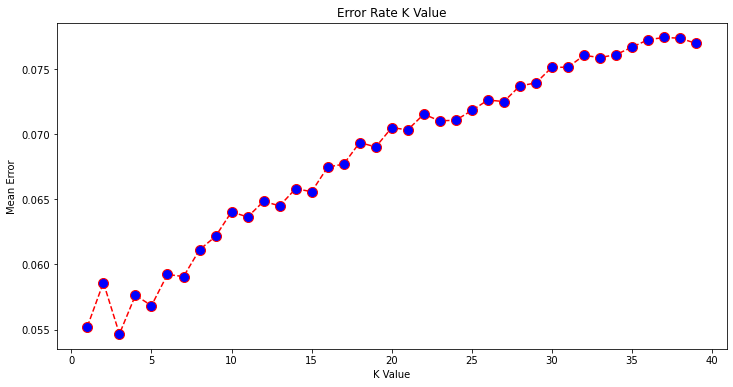

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [82]:
error_df = pd.DataFrame(error)
error_df.idxmin()

0    2
dtype: int64

In [83]:
#training the model with the best k-value
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [84]:
print(metrics.accuracy_score(y_test, y_pred))

0.9447656115849121


# Naiive Bayes

<b><p style="color : #884DFF">import libraries</p></b>

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(x_test)

In [88]:
print(gnb.score(x_test, y_test))

0.8525556636712266


# SVM 
<p style="color : #884DFF"><b>
support vector machine
A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes.SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes, as shown in the image below.Where a hyperplane is a line that linearly separates and classifies a set of data.</b><p>

In [89]:
# import libraries
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

<p style="color : #884DFF"><b>Feature scaling(normalizing the data), as seen in the next step, we normalized our data, because svm is a model that calculates the distance between observations, thus feature scaling will reduce the run time. And it will also increase the model's accuracy.</b></p>

In [103]:
#Transform features by scaling each feature to a given range, just like a model we will be creating an instance of it,
#training it and then using it
scaling = MinMaxScaler(feature_range=(0,1)).fit(x_train)
#transform x_train, & x_test into their normalized form 
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

<p style="color : #884DFF"><b>To understand the svm model provided by sklearn, we first need to understand that svm works best with linear data, thus if it is not provided with linear data, it will be really hard for it to classify the data.
    This is where the kernal comes in handy, it transforms one dimensional data, into a higher dimension, thus we can linearly devide our data by a linear plane(hyperplane, mentioned before)</b></p>

In [104]:
# create an instance of the svm model, where svc stands for support vector classification
model = SVC(kernel = 'linear')

In [105]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [106]:
svm_pred = model.predict(x_test)

In [107]:
metrics.accuracy_score(y_test, svm_pred)

0.8836929769332036